### https://github.com/dn23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data
All_Stocks=pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')
All_Stocks_filtered=All_Stocks[All_Stocks['Name'].isin(['MSFT','AAPL','GOOGL'])].reset_index(drop=True)
All_Stocks_filtered.head()

,Date,Open,High,Low,Close,Volume,Name
0,2017-01-03,115.80,116.33,114.76,116.15,28781865,AAPL
1,2017-01-04,115.85,116.51,115.75,116.02,21118116,AAPL
2,2017-01-05,115.92,116.86,115.81,116.61,22193587,AAPL
3,2017-01-06,116.78,118.16,116.47,117.91,31751900,AAPL
4,2017-01-09,117.95,119.43,117.94,118.99,33561948,AAPL


Text(0.5,1,'Stock price movement')

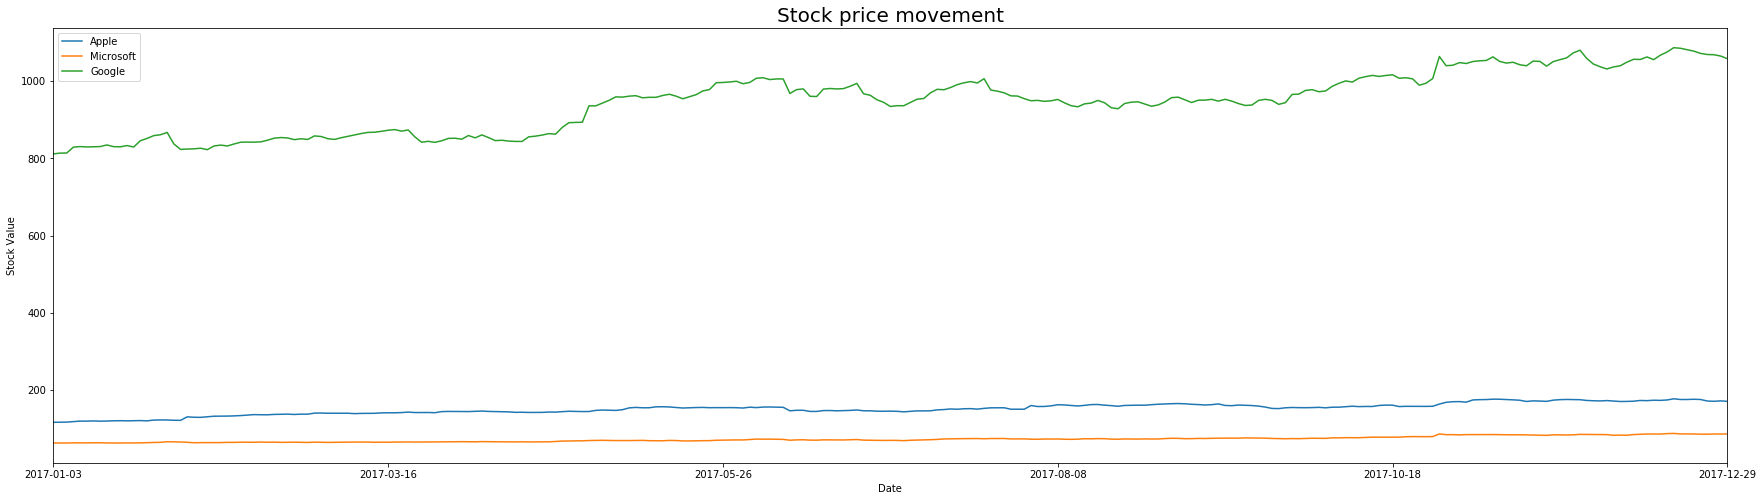

In [3]:
#basic stock price movement for Apple Microsoft and Google
fig,axes=plt.subplots(figsize=(30,8))
All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'].plot(x='Date',y='High',label='Apple',ax=axes)
All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'].plot(x='Date',y='High',label='Microsoft',ax=axes)
All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'].plot(x='Date',y='High',label='Google',ax=axes)
axes.set_ylabel("Stock Value")
axes.set_title("Stock price movement",fontsize=20)

Text(0.5,1,'Stock volume movement')

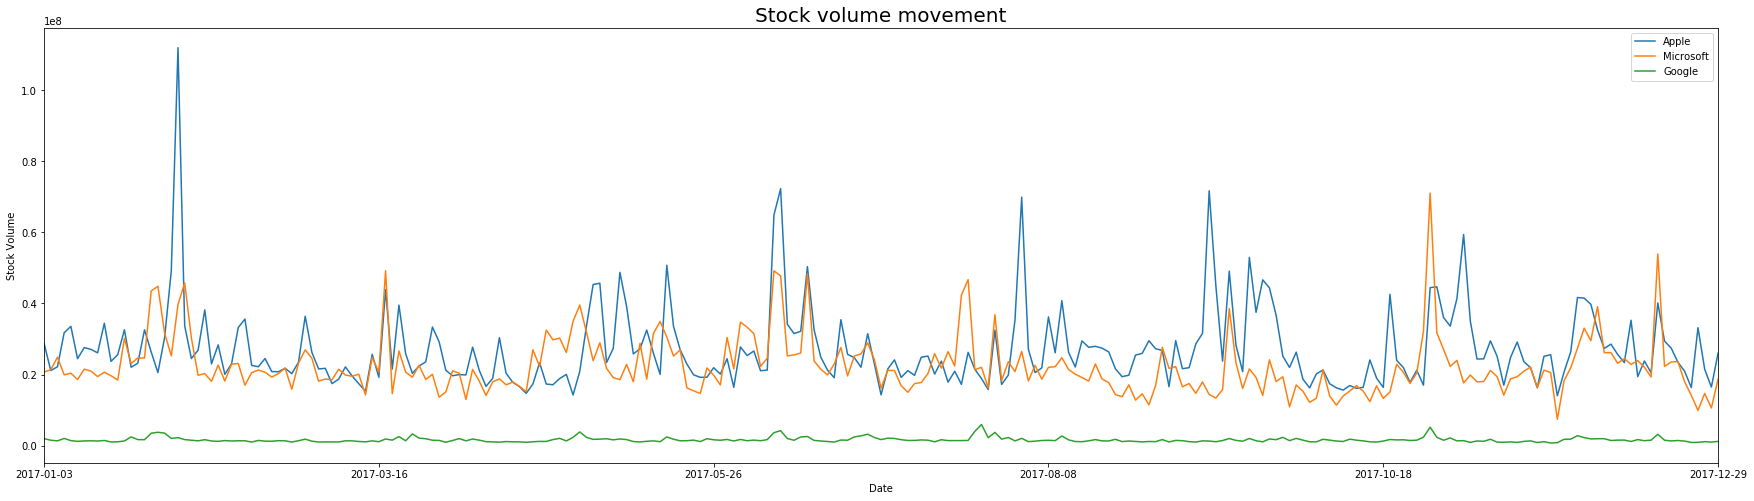

In [4]:
#basic stock Volume movement for Apple Microsoft and Google
fig,axes=plt.subplots(figsize=(30,8))
All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'].plot(x='Date',y='Volume',label='Apple',ax=axes)
All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'].plot(x='Date',y='Volume',label='Microsoft',ax=axes)
All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'].plot(x='Date',y='Volume',label='Google',ax=axes)
axes.set_ylabel("Stock Volume")
axes.set_title("Stock volume movement",fontsize=20)

Text(0.5,0,'Date')

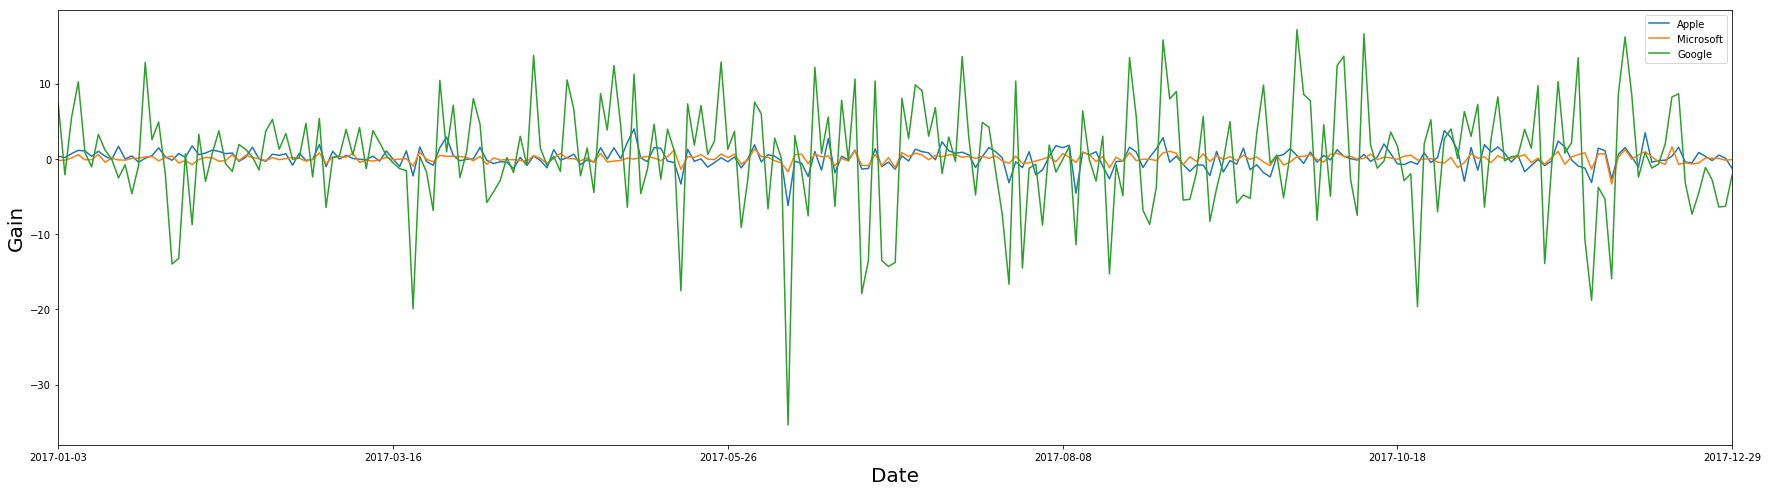

In [5]:
# Gain = Close - Open
All_Stocks_filtered['Gain']=All_Stocks_filtered['Close']-All_Stocks_filtered['Open']
fig,axes=plt.subplots(figsize=(30,8))
All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'].plot(x='Date',y='Gain',label='Apple',ax=axes)
All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'].plot(x='Date',y='Gain',label='Microsoft',ax=axes)
All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'].plot(x='Date',y='Gain',label='Google',ax=axes)
axes.set_ylabel("Gain",fontsize=20)
axes.set_xlabel("Date",fontsize=20)

Text(0.5,1,'Volumes of Stock transfered in 2017')

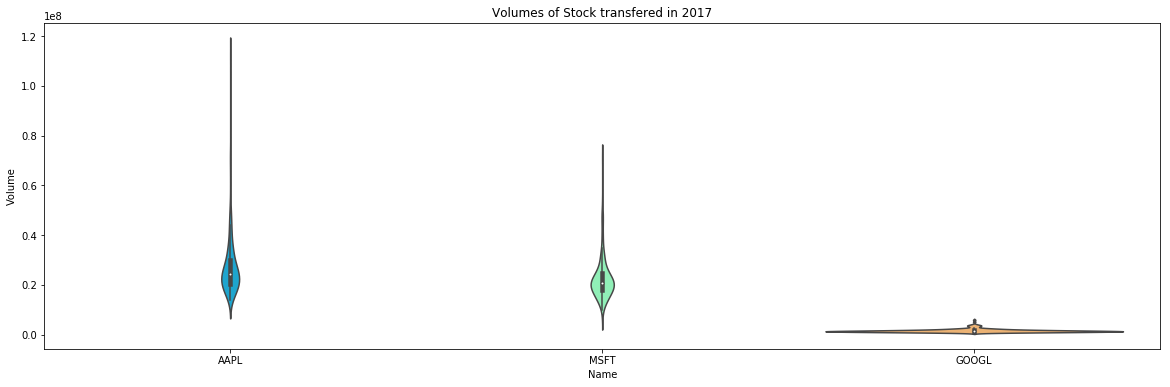

In [6]:
plt.subplots(figsize=(20,6))
sns.violinplot(x="Name", y="Volume", data=All_Stocks_filtered,palette='rainbow')
plt.title("Volumes of Stock transfered in 2017")

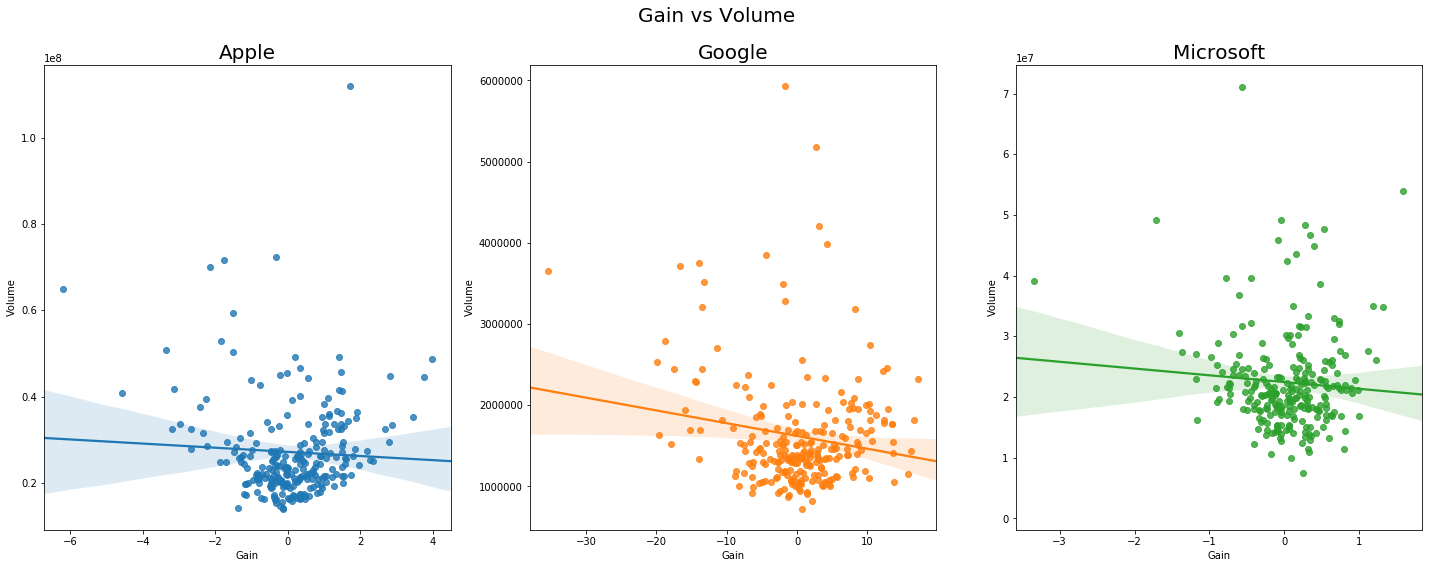

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False,figsize=(20,8))
sns.regplot(x='Gain',y='Volume',data=All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'],ax=ax1,label='Apple')
sns.regplot(x='Gain',y='Volume',data=All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'],ax=ax2)
sns.regplot(x='Gain',y='Volume',data=All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'],ax=ax3)
plt.tight_layout()
ax1.set_title('Apple',fontsize=20)
ax2.set_title('Google',fontsize=20)
ax3.set_title('Microsoft',fontsize=20)
plt.suptitle('Gain vs Volume',fontsize=20)
plt.tight_layout()
fig.subplots_adjust(top=0.88)

Text(0.5,1,'Google')

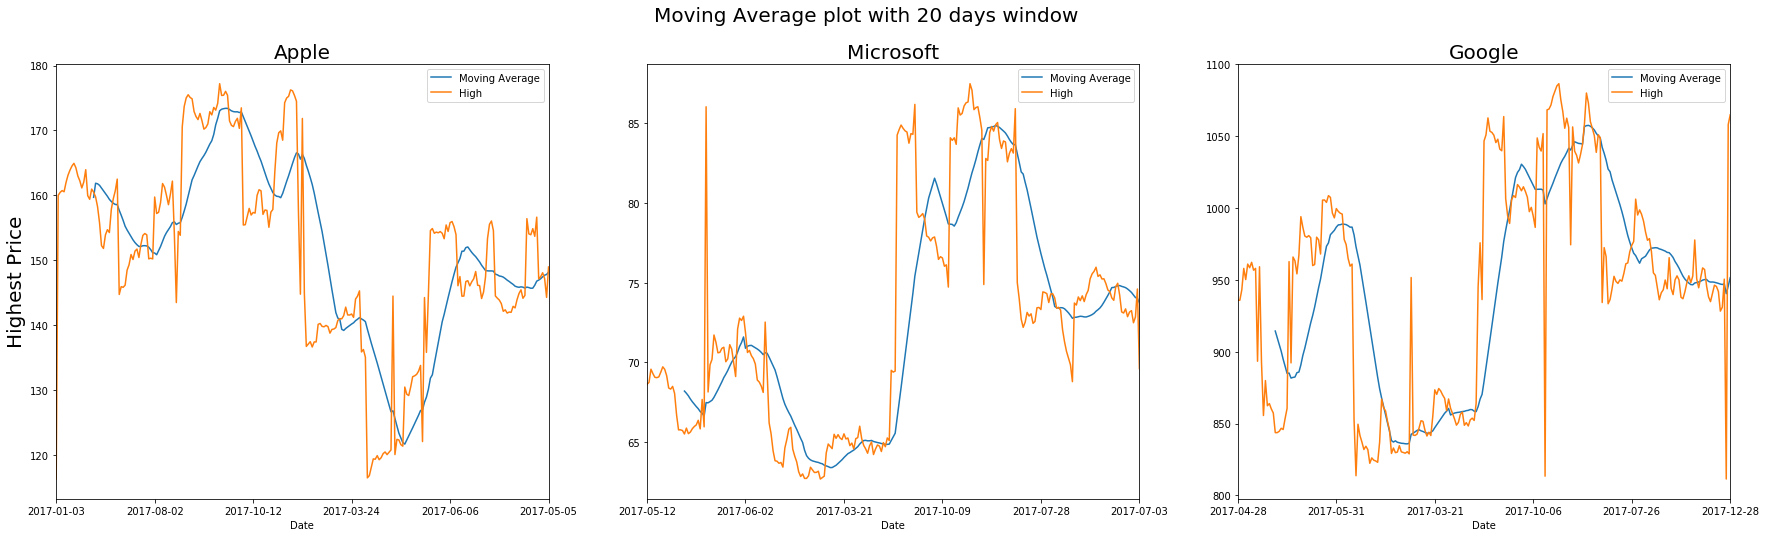

In [8]:
#moving average plot
All_Stocks_filtered=All_Stocks_filtered.sort_values(by='Name',ascending=True).reset_index(drop=True)
All_Stocks_filtered['20d']= All_Stocks_filtered.groupby("Name")['High'].rolling(20).mean().reset_index(drop=True)
fig,axes=plt.subplots(1,3,figsize=(30,8))
All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'].plot(x='Date',y='20d',label='Moving Average',ax=axes[0])
All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'].plot(x='Date',y='20d',label='Moving Average',ax=axes[1])
All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'].plot(x='Date',y='20d',label='Moving Average',ax=axes[2])
All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'].plot(x='Date',y='High',label='High',ax=axes[0])
All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'].plot(x='Date',y='High',label='High',ax=axes[1])
All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'].plot(x='Date',y='High',label='High',ax=axes[2])
plt.suptitle("Moving Average plot with 20 days window",fontsize=20)
fig.subplots_adjust(top=0.88)
axes[0].set_ylabel("Highest Price",fontsize=20)
axes[0].set_title('Apple',fontsize=20)
axes[1].set_title('Microsoft',fontsize=20)
axes[2].set_title('Google',fontsize=20)

Text(156.25,0.5,'closing Price')

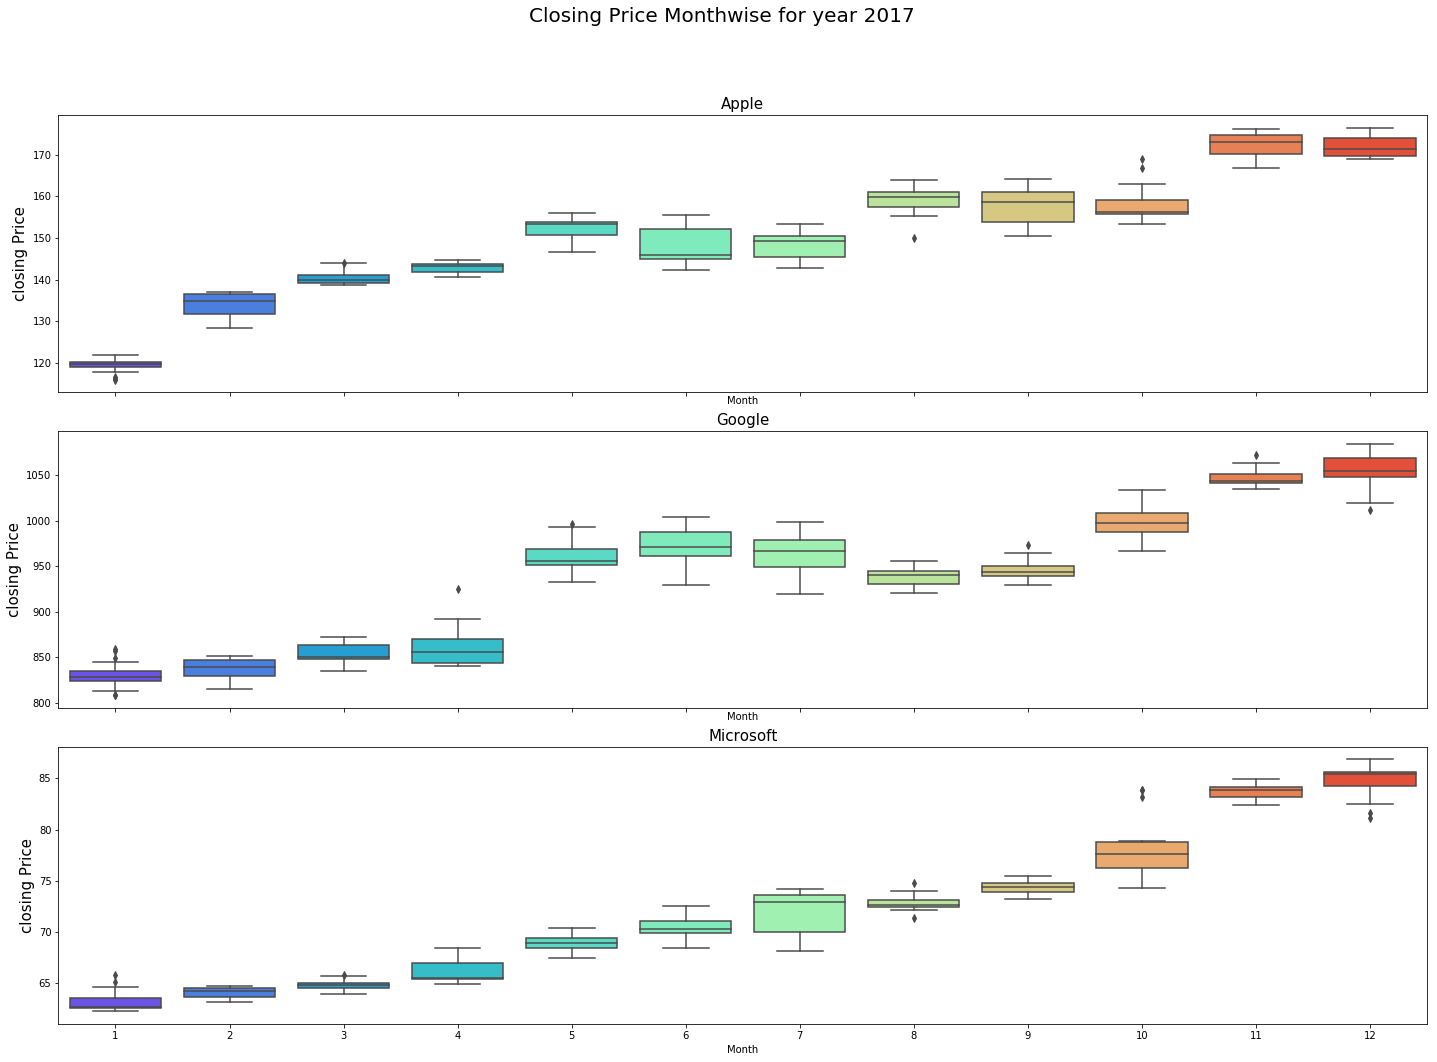

In [9]:
#monthly closing price distribution
All_Stocks_filtered['Month']=pd.to_datetime(All_Stocks_filtered['Date']).dt.month
fig,axes=plt.subplots(3,1,figsize=(20,15),sharex=True)
sns.boxplot(ax=axes[0],x='Month',y='Close',data=All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL'],palette='rainbow')
sns.boxplot(ax=axes[1],x='Month',y='Close',data=All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL'],palette='rainbow')
sns.boxplot(ax=axes[2],x='Month',y='Close',data=All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT'],palette='rainbow')
plt.suptitle("Closing Price Monthwise for year 2017",fontsize=20)
axes[0].set_title("Apple",fontsize=15)
axes[1].set_title('Google',fontsize=15)
axes[2].set_title("Microsoft",fontsize=15)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
axes[0].set_ylabel("closing Price",fontsize=15)
axes[1].set_ylabel("closing Price",fontsize=15)
axes[2].set_ylabel("closing Price",fontsize=15)


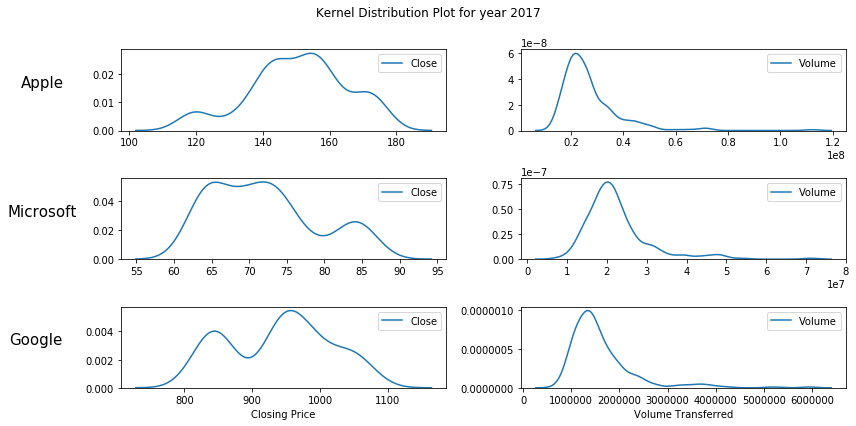

In [25]:
#kde 
fig,axes=plt.subplots(3,2,figsize=(12,6))
sns.kdeplot(All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL']['Close'],ax=axes[0,0])
sns.kdeplot(All_Stocks_filtered[All_Stocks_filtered['Name']=='AAPL']['Volume'],ax=axes[0,1])
sns.kdeplot(All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT']['Close'],ax=axes[1,0])
sns.kdeplot(All_Stocks_filtered[All_Stocks_filtered['Name']=='MSFT']['Volume'],ax=axes[1,1])
sns.kdeplot(All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL']['Close'],ax=axes[2,0])
sns.kdeplot(All_Stocks_filtered[All_Stocks_filtered['Name']=='GOOGL']['Volume'],ax=axes[2,1])
plt.suptitle("Kernel Distribution Plot for year 2017")
axes[2,0].set_xlabel("Closing Price")
axes[2,1].set_xlabel("Volume Transferred")
axes[0,0].set_ylabel("Apple",rotation=0,labelpad=50,fontsize=15)
axes[1,0].set_ylabel("Microsoft",rotation=0,labelpad=50,fontsize=15)
axes[2,0].set_ylabel("Google",rotation=0,labelpad=50,fontsize=15)
plt.tight_layout()
fig.subplots_adjust(top=0.88)

Text(156.375,0.5,'closing Price')

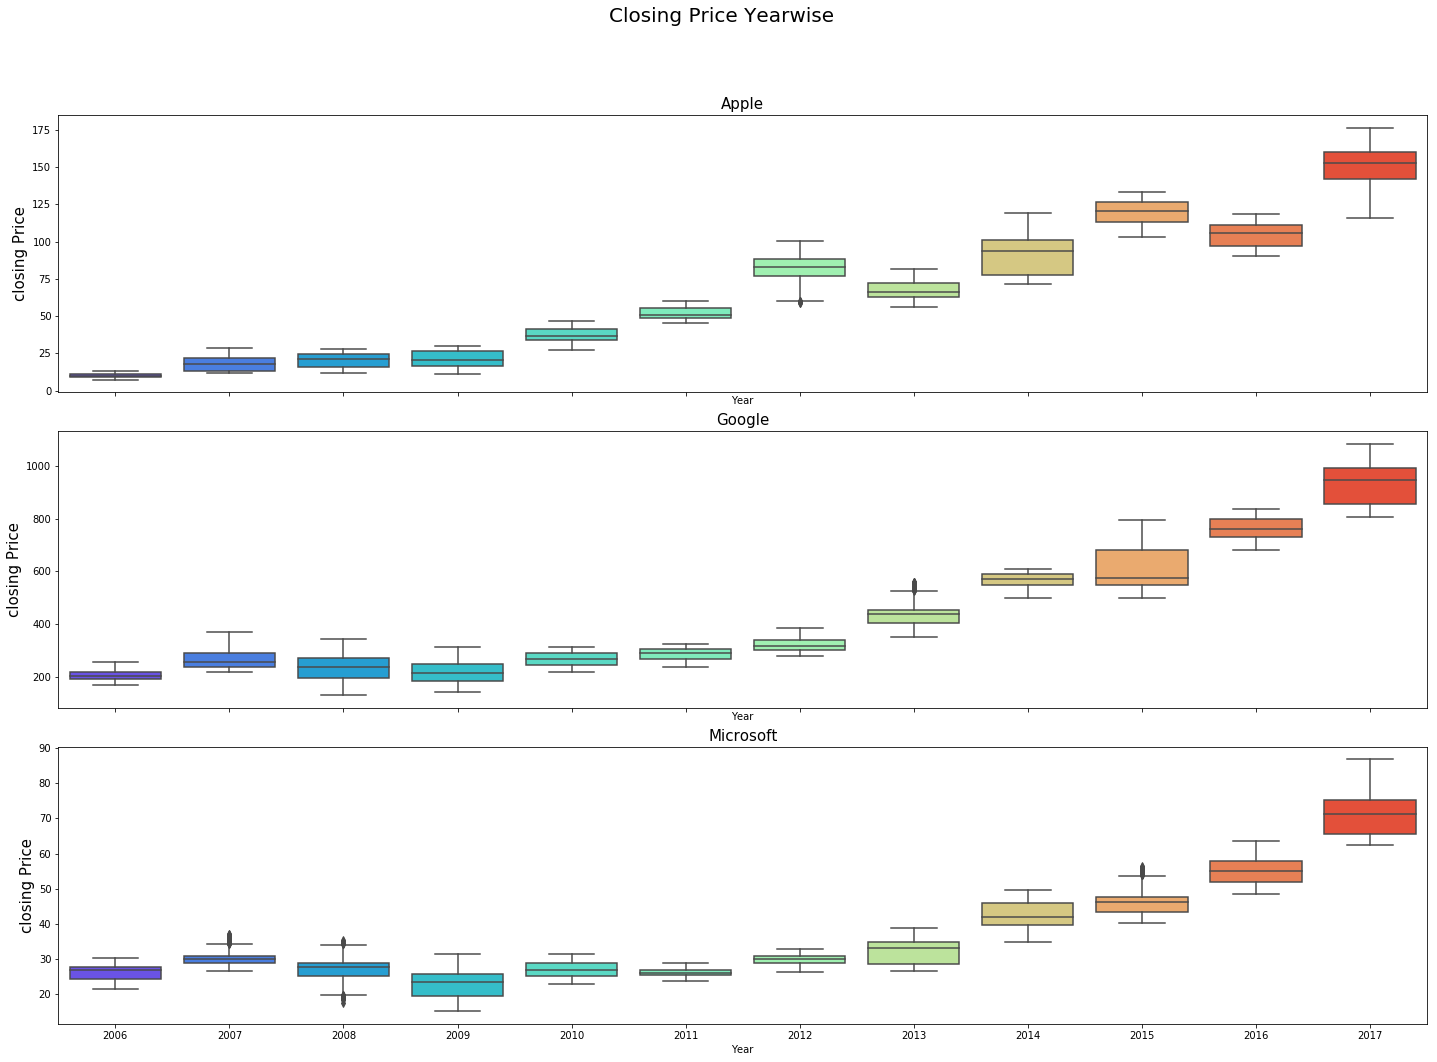

In [26]:
#Yearly closing price distribution
all_stocks_all_year=pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")
all_stocks_all_year=all_stocks_all_year[all_stocks_all_year['Name'].isin(['AAPL','GOOGL','MSFT'])].reset_index(drop=True)
all_stocks_all_year['Year']=pd.to_datetime(all_stocks_all_year['Date']).dt.year
fig,axes=plt.subplots(3,1,figsize=(20,15),sharex=True)
sns.boxplot(ax=axes[0],x='Year',y='Close',data=all_stocks_all_year[all_stocks_all_year['Name']=='AAPL'],palette='rainbow')
sns.boxplot(ax=axes[1],x='Year',y='Close',data=all_stocks_all_year[all_stocks_all_year['Name']=='GOOGL'],palette='rainbow')
sns.boxplot(ax=axes[2],x='Year',y='Close',data=all_stocks_all_year[all_stocks_all_year['Name']=='MSFT'],palette='rainbow')
plt.suptitle("Closing Price Yearwise",fontsize=20)
axes[0].set_title("Apple",fontsize=15)
axes[1].set_title('Google',fontsize=15)
axes[2].set_title("Microsoft",fontsize=15)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
axes[0].set_ylabel("closing Price",fontsize=15)
axes[1].set_ylabel("closing Price",fontsize=15)
axes[2].set_ylabel("closing Price",fontsize=15)

C:\Users\dwark\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\dwark\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


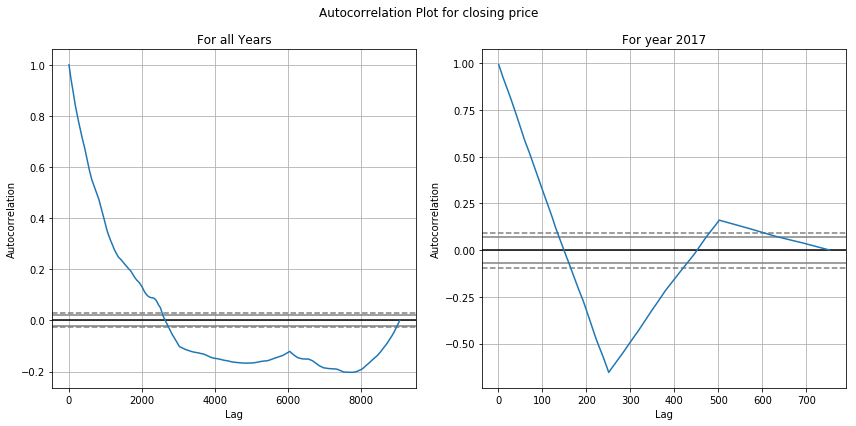

In [27]:
#Auto Correlation Plot
from pandas.tools.plotting import autocorrelation_plot
fig,axes=plt.subplots(1,2,figsize=(12,6))
all_stocks_all_year['Gain']=all_stocks_all_year['Close']-all_stocks_all_year['Open']
all_stocks_all_year_indexed=all_stocks_all_year.set_index('Date',drop=True)
autocorrelation_plot(all_stocks_all_year_indexed['Close'],ax=axes[0])
All_Stocks_filtered_indexed=All_Stocks_filtered.set_index('Date',drop=True)
autocorrelation_plot(All_Stocks_filtered_indexed['Close'],ax=axes[1])
plt.suptitle("Autocorrelation Plot for closing price")
axes[0].set_title("For all Years")
axes[1].set_title("For year 2017")
plt.tight_layout()
fig.subplots_adjust(top=0.88)